# Discussion 08 - k-Means Clustering, Fuzzy c-Means Clustering, Hierarchical Clustering

## Goals

- Unsupervised Learning
- Clustering Algorithms
    - Measuring Distance
    - Cluster Centroids
- k-Means Clustering
- Fuzzy c-Means Clustering
- Hierarchical Clustering
    - Measuring Distance between Clusters

Instructor : Bharath Kinnal

## Unsupervised Learning

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data. Unlike in supervised learning, there is no correct answers and there is no teacher in unsupervised learning. Here, the model is only given the input data (X) and no corresponding output variables, and the algorithm used in the model discovers and presents the interesting structure present in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

- __Clustering problem :__ A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior. Some common clustering algorithms are given below :
    - k-means clustering
    - Fuzzy c-means clustering
    - Hierarchical clustering
- __Association problem :__ An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y. The Apriori algorithm is an example of an association rule learning algorithm.



## Clustering Algorithms

Cluster analysis, or clustering, is an unsupervised machine learning task. It involves automatically discovering natural grouping in data. Unlike supervised learning, clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

A cluster is often an area of density in the feature space where examples from the domain (observations or rows of data) are closer to the cluster than other clusters. The cluster may have a center (the centroid) that is a sample or a point feature space and may have a boundary or extent. All clustering algorithms make use of the distance between any two input data points in the feature space.

### Measuring Distance
A distance measure is an objective score that summarizes the relative difference between two data points in a feature space. Measuring distance between two data points is often found to be a fundamental step in many machine learning algorithms. A short list of some of the more popular machine learning algorithms that use distance measures at their core is as follows:
- K-Nearest Neighbors
- Learning Vector Quantization (LVQ)
- Self-Organizing Map (SOM)
- K-Means Clustering
- Fuzzy c-Means Clustering

There are many ways to measure distance between two given data points in the feature space. Some commonly used distance measures are given below :
- Euclidean Distance
- Manhattan Distance
- Minkowski Distance
- Cosine Distance

#### Euclidean Distance
Given two data points $x = (x_1, \dots, x_n)$ and $y = (y_1, \dots, y_n)$, the Euclidean distance between them is calculated as follows :
$$d_{Euclidean} = \sqrt{(x_1 - y_1)^2 + \dots + (x_n - y_n)^2}$$

In [225]:
#from scipy.spatial.distance import euclidean

from math import sqrt
 
def euclidean(a, b):
    return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]

dist = euclidean(row1, row2)
print(dist)

6.082762530298219


#### Manhattan Distance (Cityblock Distance)
Given two data points $x = (x_1, \dots, x_n)$ and $y = (y_1, \dots, y_n)$, the Manhattan distance between them is calculated as follows :
$$d_{Manhattan} = |x_1 - y_1| + \dots + |x_n - y_n|$$

In [226]:
#from scipy.spatial.distance import cityblock

def cityblock(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]

dist = cityblock(row1, row2)
print(dist)

13


#### Minkowski Distance
Minkowski Distance is a generalization of the Euclidean and Manhattan distance measures and adds a parameter, called the _order_ $p$, that allows different distance measures to be calculated.

Given two data points $x = (x_1, \dots, x_n)$ and $y = (y_1, \dots, y_n)$, the Minkowski distance between them is calculated as follows :
$$d_{Minkowski} = [|x_1 - y_1|^p + \dots + |x_n - y_n|^p]^\frac{1}{p}$$

In [230]:
#from scipy.spatial.distance import minkowski_distance
 
def minkowski_distance(a, b, p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]

dist = minkowski_distance(row1, row2, 3)
print(dist)

4.862944131094279


#### Cosine Distance
Cosine distance is a form of correlation-based distance measure. Using this measure, one can consider two objects to be close to each other (similar) if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean or Minkowski distance. The distance between two objects is 0 when they are perfectly correlated. Cosine distance is quite sensitive to outliers.

The cosine similarity is the cosine function of the angle between the two feature vectors in a multidimensional space. Given two data points $x = (x_1, \dots, x_n)$ and $y = (y_1, \dots, y_n)$, the Cosine distance between them is calculated as follows :
$$d_{Cosine} = 1 - \frac{x \cdot y}{\Vert x \Vert^2 \Vert y \Vert^2}$$

In [231]:
#from sklearn.metrics.pairwise import cosine_distances

from math import sqrt

def cosine_distances(a, b):
    numerator = sum(e1*e2 for e1, e2 in zip(a,b))
    denominator = sqrt(sum(e1*e1 for e1 in a) * sum(e2*e2 for e2 in b))
    
    return 1 - (numerator / denominator)

row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]

dist = cosine_distances(row1, row2)
print(dist)

0.006746536411526227


### Cluster Centroids

The cluster centroid is considered as a measure of cluster location. Usually, the centroid is considered as the multi-dimensional average of the cluster. Each centroid represents the _average observation_ within a cluster across all the attributes in the analysis.

Given a cluster $c_j = \{x_1, x_2, \dots, x_n\}$, the centroid is calculated to be :
$$\mu_j = \frac{1}{|c_j|} \sum_{i=1}^{n} x_i$$

The goal of a clustering algorithm is to minimize the distance between any data point to its cluster centroid, such that the data point will be closer to its own cluster centroid compared to other centroids.

## k-Means Clustering

k-Means clustering is an iterative algorithm that partitions a group of $n$ data points into $k$ subgroups. The value of $k$ is predefined by the developer.

The objective of the k-means clustering is to minimize the distance that each point has from the centroid of the cluster. This is known as __intra-cluster variance__ and can be minimized iteratively using the following objective function :

$$J = \sum_{j=1}^{k} \sum_{i=1}^{n} (x_i^j - c_j)^2$$

Here, $J$ is the objective function of the centroid of the cluster, $c_j$ is a cluster centroid, $x_i^j$ is a data point belonging to cluster $j$ in the current iteration of the algorithm.

The steps associated with the k-means clustering algorithm is shown below :

- Finalize the number of clusters you want to identify in your data. This is the $k$ in k-means clustering.
- __Initialization Step :__ Randomly initialize $k$ cluster centroids in the feature space. Towards the end of the algorithm, these points will converge they will be at the center of their respective cluster.
- __Assignment Step :__ For any input data point, find the closest cluster centroid to that data point using a given distance measure, and assign the data point to the respective cluster.
- __Update Step :__ Update the new cluster centroids to be the mean of the all data points present within the cluster.
- Repeat the __assignment__ and __update__ steps till cluster centroid positions do not change. K-means algorithm will converge when we get the unchanged position of cluster centroids.

Once K-means algorithm is converged, data point assigned to respective centroid will represent the respective cluster. During cluster assignment step if we found a centroid who has no data point associated with it, then it's better to remove it.

In [232]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [255]:
from sklearn.cluster import KMeans

k = 2

est = KMeans(n_clusters=k)

In [256]:
import sys
#!{sys.executable} -m pip install mpl_toolkits

import mpl_toolkits

In [257]:
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

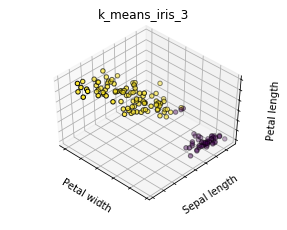

In [258]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('k_means_iris_3')
ax.dist = 12
#fignum = fignum + 1

<ipython-input-250-fb06e4ed31e4>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


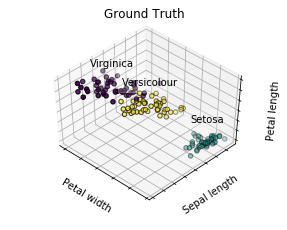

In [250]:
import numpy as np

np.random.seed(5)

# Plot the ground truth
fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## Fuzzy c-Mean Clustering

The k-means clustering algorithm only allows a given input data point to lie in only one cluster. In contrast, fuzzy c-means clustering allows a data point to lie in multiple clusters. In this clustering algorithm, a membership value $w_{ij}$ is associated between a given data point $x_i$ and a cluster centroid $c_j$, where $0 \le w_{ij} \le 1$.

Given the number of cluster centroids to be $k$, the goal of the fuzzy c-mean algorithm is to minimize the following objective function :

$$J = \sum_{j=1}^{k} \sum_{i=1}^{n} w_{ij} (x_i - c_j)^2$$

The weights $w_{ij}$ is the membership value (weight) associated between the data point $x_i$ and the cluster centroid $c_j$. These weights are updated in each iteration using the following equation :

$$w_{ij} = \frac{1}{\sum_{l=1}^{k} (\frac{|x_i−c_j|}{|x_i−c_l|})^\frac{2}{m−1}}$$

The value $w_{ij}$ is inversely proportional to the distance from $x_i$ to the cluster center $c_l$.

The parameter $m$ is a real number ($1 < m < \infty$) and it defines the level of cluster fuzziness. Note that, a value of $m$ close to 1 gives a cluster solution which becomes increasingly similar to the solution of hard clustering such as k-means; whereas a value of $m$ close to infinite leads to complete fuzzyness.

In fuzzy clustering the centroid of a cluster is the mean of all points, weighted by their degree of belonging to the cluster:

$$c_j = \frac{\sum_{x_i \in \text{ cluster } j}w_{ij}x_i}{\sum_{x_i \in \text{ cluster } j}w_{ij}}$$

The steps associated with the fuzzy c-means clustering algorithm is shown below :

- Finalize the number of clusters you want to identify in your data. This is the $k$ in k-means clustering.
- __Initialization Step :__ Randomly initialize $k$ cluster centroids in the feature space. Towards the end of the algorithm, these points will converge they will be at the center of their respective cluster.
- __Weight Update Step :__ For any input data point $x_i$ and any cluster centroid $c_j$, update the corresponding weight $w_{ij}$.
<!-- - __Assignment Step :__ For any input data point, find the closest cluster centroid to that data point using a given distance measure, and assign the data point to the respective cluster. -->
- __Centroid Update Step :__ Update the new cluster centroids to be the weighted mean of the all data points present within the feature space.

- Repeat the __weight update__ and __centroid update__ steps till cluster centroid positions do not change. Fuzzy c-means algorithm will converge when we get the unchanged position of cluster centroids.|

In [52]:
!{sys.executable} -m pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 993 kB 92 kB/s eta 0:00:011
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=39b90cec72d3a2d6ee311c043ff59c974fcb477368fa59e42895742ff6c74da0
  Stored in directory: /home/bharath/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [251]:
import pandas as pd # reading all required header files
import numpy as np

In [252]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [254]:
import skfuzzy as fuzz

cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(X.T, 3, 5, error=0.005, maxiter=1000)

print("Centers : ",cntr)
print("Weights")
print(u_orig)

Centers :  [[5.01061832 3.4009406  1.49720404 0.25240895]
 [6.60830171 3.01599495 5.43896571 1.98874478]
 [5.95369888 2.82556253 4.41555898 1.41512114]]
Weights
[[0.70577813 0.60384882 0.61100292 0.58382381 0.67778408 0.53701453
  0.60863402 0.81037968 0.53413409 0.62529459 0.58306074 0.66815332
  0.59097662 0.52587328 0.50010138 0.47368097 0.54885178 0.70567738
  0.51178435 0.60684846 0.588837   0.62590678 0.56364958 0.61627907
  0.585127   0.60105322 0.6952816  0.677087   0.67957252 0.61363055
  0.61299859 0.59955981 0.53925708 0.5095098  0.6344725  0.62865275
  0.57610016 0.65255721 0.54290565 0.75369575 0.67965686 0.48151333
  0.55773528 0.6108826  0.55002393 0.59434821 0.6015386  0.5967956
  0.60343129 0.72054279 0.20818753 0.19086752 0.19196938 0.24370498
  0.1835755  0.17082092 0.18761609 0.33174083 0.19420761 0.25955281
  0.31258458 0.17543531 0.24345564 0.16284484 0.2691032  0.20667426
  0.18688326 0.22090878 0.20259615 0.24762597 0.18757735 0.20458469
  0.1835027  0.1738802  

<!-- fig2, ax2 = plt.subplots()
ax2.set_title('Fuzzy c-mean clustering')
#u_orig = u_orig.T
#print(u_orig)
lab = u_orig.argmax(axis=0)
clust = [[], [], []]
for j in range(150):
    clust[lab[j]].append(X[j])
    
for j in range(3) :
    x = clust[j]
    print(x[:][0])
    ax2.plot(x[:][0],
             x[:][1], 'o',
             label='series ' + str(j)) -->

## Hierarchical Clustering

Hierarchical clustering is a type of clustering in which multiple clusters are defined in a feature space over a set of dat apoints in a hierarchical manner. The hierarchy of the clusters is represented as a dendrogram or tree structure. Hierarchical clustering algorithms mainly fall into the following two categories.

- __Agglomerative hierarchical algorithms :__ In agglomerative hierarchical algorithms, each data point is treated as a single cluster, and small clusters successively merge or agglomerate (bottom-up approach) the to form large clusters. This process of creating cluster hierarchy follows a __bottom-up approach__.

- __Divisive hierarchical algorithms :__ In divisive hierarchical algorithms, all the data points are treated as one big cluster and the process of clustering involves dividing the one big cluster into various small clusters. This process of creating cluster hierarchy follows a __top-down approach__.

We will be focussing more on agglomerative clustering to create a cluster hierarchy. The steps to perform agglomerative clustering is as follows −

- Treat each data point as single cluster. Given $n$ data points in the feature space, the number of clusters will be $n$.
- Merge the two clusters which are closest to each other to form a larger cluster that will be higher up in the hierarchy. Repeat this step until all clusters are merged to form a single big cluster.


### Measuring Distance between Clusters

In hierarchical clustering, one of the steps may include finding the distance between two clusters. The manner in which two clusters are linked together (__linkage__) is affected by the distance measure used between these clusters. 

Hierarchical clustering can be categorized based on linkage type as follows :

- __Single-Linkage Clustering :__ Link between two clusters is decided based on the __minimum distance__ between any two data points of each cluster.
- __Complete-Linkage Clustering :__ Link between two clusters is decided based on the __maximum distance__ between any two data points of each cluster.
- __Average-Linkage Clustering :__ Link between two clusters is decided based on the __average distance__ with respect to all data points of each cluster.
- __Centroid-Linkage Clustering :__ Link between two clusters is decided based on the __distance between the centroids__ of each cluster.


In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.cluster import AgglomerativeClustering


In [270]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2,3]]
Y = iris.target

print("Dataset Features : ", iris.feature_names)
print("Dataset Target : ", iris.target_names)
#|print('Dataset Size : ', X.shape, Y.shape)

Dataset Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Target :  ['setosa' 'versicolor' 'virginica']


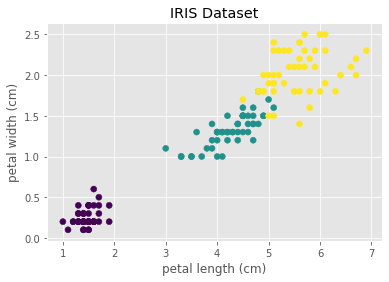

In [271]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,0], X[:, 1], c=Y)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.title("IRIS Dataset")

In [278]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="single", affinity = 'manhattan')
Y_preds = clustering.fit_predict(X)

Y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [279]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(Y, Y_preds)

0.5657466140922338

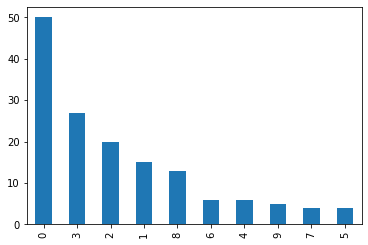

In [281]:
clustering = AgglomerativeClustering(n_clusters = None, linkage="average", affinity = 'euclidean', distance_threshold= 0.5)
agg_result = clustering.fit(X)

clustering = pd.Series(agg_result.labels_, name='class')
distribution = clustering.value_counts()
#print(distribution)

_ = distribution.plot(kind='bar')

In [286]:
#Using scipy
import scipy
from scipy.cluster import hierarchy


#clusters = hierarchy.linkage(X, method="average", metric='euclidean')
#clusters = hierarchy.linkage(X, method="average", metric='cityblock')
clusters = hierarchy.linkage(X, method="average")

clusters[:10]

array([[  0.,   1.,   0.,   2.],
       [  4., 150.,   0.,   3.],
       [  2.,  36.,   0.,   2.],
       [  3.,   7.,   0.,   2.],
       [  8., 151.,   0.,   4.],
       [  6.,  17.,   0.,   2.],
       [ 10., 153.,   0.,   3.],
       [ 28., 154.,   0.,   5.],
       [  9.,  32.,   0.,   2.],
       [ 27., 156.,   0.,   4.]])

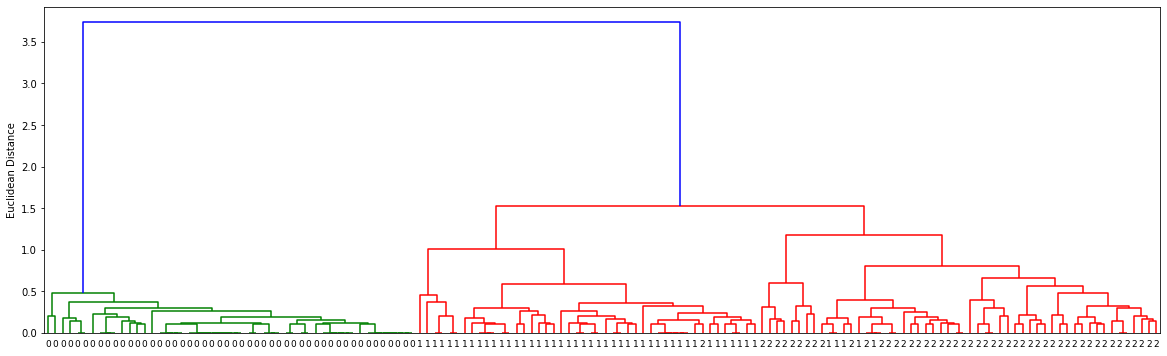

In [287]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=Y, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');

plot_dendrogram(clusters)

<!-- # Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Fuzzy c-mean clustering')
u_orig = u_orig.T
for j in range(150):
    print(u_orig[j])
    ind = u_orig[j].argmax(axis=0)
    print(ind)
    ax2.plot(X[u_orig[j].argmax(axis=0)][0],
             X[u_orig[j].argmax(axis=0) == j][1], 'o',
             label='series ' + str(j))
ax2.legend() -->

<!-- import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.') -->

<!-- # Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
print(axes1[2][2])
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
 -->